# Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import ast
import sklearn.metrics
import pingouin as pg

# Utils

In [2]:
def get_zscore(s):
    return (s - s.mean()) / s.std()

def zscore_by_condition(data, metric, conditions):
    condition_df_list = []
    for group_name, group_df in data.groupby(by=conditions):
        group_df[f'z_{metric}'] = get_zscore(group_df[metric]).apply(abs)
        condition_df_list.append(group_df)

    df = pd.concat(condition_df_list)
    return df

# Params

In [3]:
data_dir = 'data'

# Conditions overview

## Training

In [4]:
all_training = []
for subject_dir in os.listdir(data_dir):
    df = pd.read_csv(f"{data_dir}\\{subject_dir}\\conditions_cogshifting_training.csv")
    all_training.append(df)

all_training_df = pd.concat(all_training)
all_training_df = all_training_df.reset_index()

all_training_df

,index,sequence,odd_ones,parameter,choices,target,target_idx,condition,stimuli,block,is_block_beginning,is_block_ending,sequence_fnames,target_fname,subject
0,0,"['blue_top_W_45', 'red_top_L_0', 'blue_bottom_...","{'color': 'red_top_L_0', 'position': 'blue_bot...",orientation,['orientation'],blue_top_W_45,0,1,letter,1,True,False,"['robot_stimuli\\\\filler.mp4', 'robot_stimuli...",robot_stimuli\\filler.mp4,0
1,1,"['blue_right_G_0', 'red_right_C_45', 'blue_rig...","{'color': 'red_right_C_45', 'position': 'blue_...",color,['color'],red_right_C_45,1,1,letter,1,False,False,"['robot_stimuli\\\\filler.mp4', 'robot_stimuli...",robot_stimuli\\filler.mp4,0
2,2,"['blue_left_Z_0', 'blue_right_D_45', 'blue_lef...","{'color': 'red_left_W_45', 'position': 'blue_r...",position,['position'],blue_right_D_45,1,1,letter,1,False,True,"['robot_stimuli\\\\filler.mp4', 'robot_stimuli...",robot_stimuli\\filler.mp4,0
3,3,"['red_bottom_Q_45', 'blue_bottom_X_45', 'blue_...","{'color': 'red_bottom_Q_45', 'position': 'blue...",orientation,"['color', 'orientation']",blue_bottom_Z_0,2,2,letter,1,True,False,"['robot_stimuli\\\\filler.mp4', 'robot_stimuli...",robot_stimuli\\filler.mp4,0
4,4,"['red_bottom_P_45', 'blue_left_S_45', 'red_lef...","{'color': 'blue_left_S_45', 'position': 'red_b...",color,"['color', 'position']",blue_left_S_45,1,2,letter,1,False,False,"['robot_stimuli\\\\filler.mp4', 'robot_stimuli...",robot_stimuli\\filler.mp4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,13,"['R_Base_X_For', 'R_Head_X_For', 'L_Base_X_Bac...","{'laterality': 'L_Base_X_Back', 'localisation'...",movement,"['localisation', 'movement']",R_Base_Y_For,3,2,robot,1,False,False,"['robot_stimuli\\R_Base_X_For.mp4', 'robot_sti...",robot_stimuli\R_Base_Y_For.mp4,9
428,14,"['L_Head_Y_For', 'L_Torso_Y_Back', 'L_Head_Z_F...","{'laterality': 'R_Head_Y_Back', 'localisation'...",laterality,"['laterality', 'movement']",R_Head_Y_Back,3,2,robot,1,False,True,"['robot_stimuli\\L_Head_Y_For.mp4', 'robot_sti...",robot_stimuli\R_Head_Y_Back.mp4,9
429,15,"['R_Torso_Y_For', 'R_Torso_Z_Back', 'R_Base_Y_...","{'laterality': 'L_Torso_Y_For', 'localisation'...",localisation,"['laterality', 'localisation', 'movement']",R_Base_Y_For,2,3,robot,1,True,False,"['robot_stimuli\\R_Torso_Y_For.mp4', 'robot_st...",robot_stimuli\R_Base_Y_For.mp4,9
430,16,"['R_Arm_Y_Back', 'R_Base_Z_For', 'L_Base_Y_For...","{'laterality': 'L_Base_Y_For', 'localisation':...",movement,"['laterality', 'localisation', 'movement']",R_Base_Z_For,1,3,robot,1,False,False,"['robot_stimuli\\R_Arm_Y_Back.mp4', 'robot_sti...",robot_stimuli\R_Base_Z_For.mp4,9


9 trials for each of the 2 stimuli


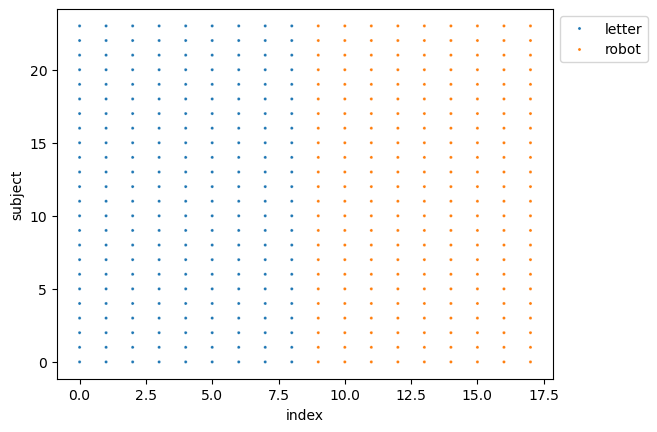

In [5]:
fig, ax = plt.subplots()
sns.scatterplot(data=all_training_df, x='index', y='subject', hue='stimuli', s=5, ax=ax)
ax.legend(bbox_to_anchor=(1,1))

print(f"{int(len(all_training_df['index'].unique())/len(all_training_df['stimuli'].unique()))} trials for each of the {len(all_training_df['stimuli'].unique())} stimuli")
plt.show()

6 blocks of 3 trials in total


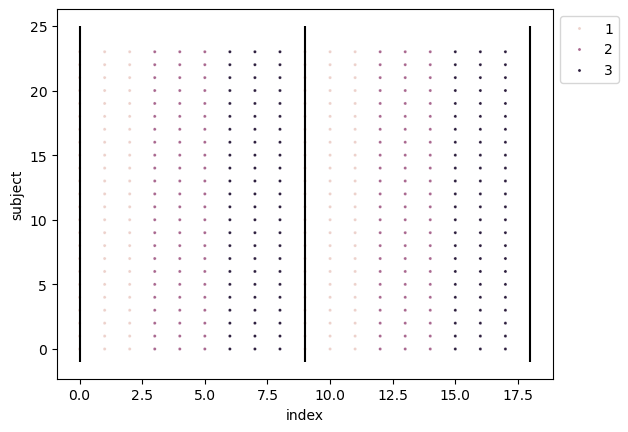

In [6]:
fig, ax = plt.subplots()

n_condition = len(all_training_df['condition'].unique())
n_trials = len(all_training_df['index'].unique())
n_blocks = len(all_training_df['block'].unique())
n_subjects = len(all_training_df['subject'].unique())

sns.scatterplot(data=all_training_df, x='index', y='subject', hue='condition', s=5, ax=ax)
ax.vlines(list(range(0, n_trials+1, int(n_trials/n_blocks))), -1, n_subjects+1, color='black')
ax.legend(bbox_to_anchor=(1,1))

print(f"{n_blocks*n_condition} blocks of {int(n_trials/(n_blocks*n_condition))} trials in total")
plt.show()

## Main

In [7]:
all_conditions = []
for subject_dir in os.listdir(data_dir):
    
    df = pd.read_csv(f"{data_dir}\\{subject_dir}\\conditions_cogshifting.csv")
    all_conditions.append(df)

all_conditions_df = pd.concat(all_conditions)
all_conditions_df = all_conditions_df.reset_index()

all_conditions_df

,index,sequence,odd_ones,parameter,choices,target,target_idx,condition,stimuli,block,is_block_beginning,is_block_ending,sequence_fnames,target_fname,subject
0,0,"['blue_bottom_R_0', 'red_bottom_N_0', 'blue_le...","{'color': 'red_bottom_N_0', 'position': 'blue_...",position,['position'],blue_left_Q_0,2,1,letter,1,True,False,"['robot_stimuli\\\\filler.mp4', 'robot_stimuli...",robot_stimuli\\filler.mp4,0
1,1,"['blue_right_T_0', 'red_right_N_45', 'blue_bot...","{'color': 'red_right_N_45', 'position': 'blue_...",position,['position'],blue_bottom_L_45,2,1,letter,1,False,False,"['robot_stimuli\\\\filler.mp4', 'robot_stimuli...",robot_stimuli\\filler.mp4,0
2,2,"['red_top_V_0', 'blue_top_H_45', 'blue_right_M...","{'color': 'red_top_V_0', 'position': 'blue_rig...",orientation,['orientation'],blue_top_H_45,1,1,letter,1,False,False,"['robot_stimuli\\\\filler.mp4', 'robot_stimuli...",robot_stimuli\\filler.mp4,0
3,3,"['blue_right_J_45', 'blue_bottom_S_0', 'blue_b...","{'color': 'red_bottom_Z_45', 'position': 'blue...",color,['color'],red_bottom_Z_45,3,1,letter,1,False,False,"['robot_stimuli\\\\filler.mp4', 'robot_stimuli...",robot_stimuli\\filler.mp4,0
4,4,"['red_left_H_0', 'red_bottom_X_45', 'red_botto...","{'color': 'blue_bottom_W_0', 'position': 'red_...",color,['color'],blue_bottom_W_0,3,1,letter,1,False,False,"['robot_stimuli\\\\filler.mp4', 'robot_stimuli...",robot_stimuli\\filler.mp4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,157,"['blue_left_C_0', 'blue_top_B_0', 'red_left_V_...","{'color': 'red_left_V_0', 'position': 'blue_to...",position,['position'],blue_top_B_0,1,1,letter,6,False,False,"['robot_stimuli\\\\filler.mp4', 'robot_stimuli...",robot_stimuli\\filler.mp4,9
3884,158,"['red_left_C_0', 'blue_left_N_45', 'blue_top_Z...","{'color': 'red_left_C_0', 'position': 'blue_to...",orientation,['orientation'],blue_left_N_45,1,1,letter,6,False,False,"['robot_stimuli\\\\filler.mp4', 'robot_stimuli...",robot_stimuli\\filler.mp4,9
3885,159,"['blue_left_B_45', 'red_right_Q_45', 'blue_rig...","{'color': 'red_right_Q_45', 'position': 'blue_...",color,['color'],red_right_Q_45,1,1,letter,6,False,False,"['robot_stimuli\\\\filler.mp4', 'robot_stimuli...",robot_stimuli\\filler.mp4,9
3886,160,"['blue_left_P_45', 'red_left_K_45', 'blue_righ...","{'color': 'red_left_K_45', 'position': 'blue_r...",orientation,['orientation'],blue_left_W_0,3,1,letter,6,False,False,"['robot_stimuli\\\\filler.mp4', 'robot_stimuli...",robot_stimuli\\filler.mp4,9


81 trials for each of the 2 stimuli


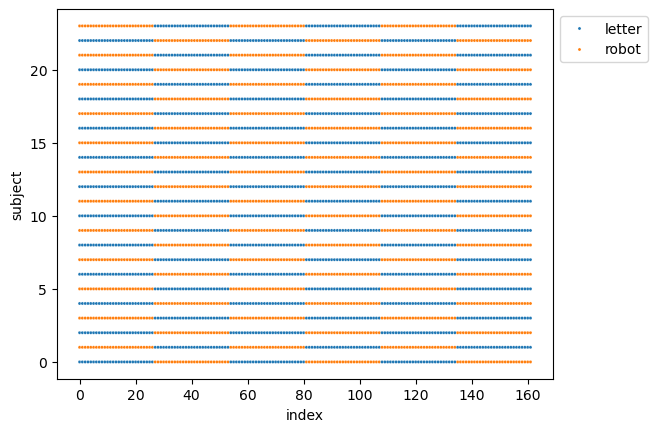

In [8]:
fig, ax = plt.subplots()
sns.scatterplot(data=all_conditions_df, x='index', y='subject', hue='stimuli', s=5, ax=ax)
ax.legend(bbox_to_anchor=(1,1))

print(f"{int(len(all_conditions_df['index'].unique())/len(all_conditions_df['stimuli'].unique()))} trials for each of the {len(all_conditions_df['stimuli'].unique())} stimuli")
plt.show()

18 blocks of 9 trials in total


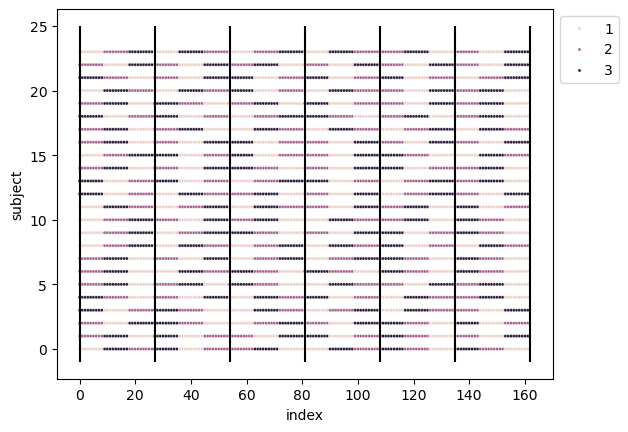

In [9]:
fig, ax = plt.subplots()

n_condition = len(all_conditions_df['condition'].unique())
n_trials = len(all_conditions_df['index'].unique())
n_blocks = len(all_conditions_df['block'].unique())
n_subjects = len(all_conditions_df['subject'].unique())

sns.scatterplot(data=all_conditions_df, x='index', y='subject', hue='condition', s=5, ax=ax)
ax.vlines(list(range(0, n_trials+1, int(n_trials/n_blocks))), -1, n_subjects+1, color='black')
ax.legend(bbox_to_anchor=(1,1))

print(f"{n_blocks*n_condition} blocks of {int(n_trials/(n_blocks*n_condition))} trials in total")
plt.show()

# Subjects

## Loading

In [10]:
all_results = []
all_match = []
for subject_dir in os.listdir(data_dir):
    result_fnames = [elem for elem in os.listdir(f'data\\{subject_dir}') if elem.split('_')[0]==subject_dir.split('_')[-1] and elem.split('.')[-1]=='csv']

    if len(result_fnames)>0:
        result_fname = result_fnames[-1]
        df = pd.read_csv(f"{data_dir}\\{subject_dir}\\{result_fname}")
        df = df[df['sequence'].apply(lambda x : isinstance(x,str))]
        df['is_training'] = df['training.thisTrialN'].notna()

        all_results.append(df)
        all_match.append(subject_dir)

print(f'Get results from {all_match}')

if len(all_match)>0:
    all_result_df = pd.concat(all_results).reset_index(drop=True)
    loaded_subjects = all_result_df['subject'].unique()

Get results from ['subject_0', 'subject_1', 'subject_10', 'subject_11', 'subject_12', 'subject_13', 'subject_14', 'subject_15', 'subject_16', 'subject_17', 'subject_18', 'subject_19', 'subject_2', 'subject_20', 'subject_21', 'subject_22', 'subject_23', 'subject_3', 'subject_4', 'subject_5', 'subject_6', 'subject_7', 'subject_8', 'subject_9']


## Main results

In [11]:
main_result_df = all_result_df[all_result_df['is_training']==False]

column_of_interest = ['sequence', 'target', 'choices', 'parameter', 'condition', 'stimuli', 'block', 'subject', 'is_training', 'trials.thisTrialN', 'recall_key.keys', 'recall_key.rt', 'RSME_ticks.response']
main_result_df = main_result_df[column_of_interest].rename(columns={'trials.thisTrialN':'trial_n', 'recall_key.keys':'keys', 'recall_key.rt':'rt', 'RSME_ticks.response':'rsme'})

for col in ['sequence', 'choices']:
    main_result_df[col] = main_result_df[col].apply(ast.literal_eval)

main_result_df[['condition','block','subject','trial_n']] = main_result_df[['condition','block','subject','trial_n']].astype(int)

main_result_df['selected'] = main_result_df.apply(lambda x : x['sequence'][int(x['keys'])-1], axis=1)
main_result_df['correct'] = main_result_df.apply(lambda x : x['target']==x['selected'], axis=1)

main_result_df

,sequence,target,choices,parameter,condition,stimuli,block,subject,is_training,trial_n,keys,rt,rsme,selected,correct
18,"[blue_bottom_R_0, red_bottom_N_0, blue_left_Q_...",blue_left_Q_0,[position],position,1,letter,1,0,False,0,3.0,1.081057,NaN,blue_left_Q_0,True
19,"[blue_right_T_0, red_right_N_45, blue_bottom_L...",blue_bottom_L_45,[position],position,1,letter,1,0,False,1,3.0,5.593063,NaN,blue_bottom_L_45,True
20,"[red_top_V_0, blue_top_H_45, blue_right_M_0, b...",blue_top_H_45,[orientation],orientation,1,letter,1,0,False,2,2.0,0.742668,NaN,blue_top_H_45,True
21,"[blue_right_J_45, blue_bottom_S_0, blue_bottom...",red_bottom_Z_45,[color],color,1,letter,1,0,False,3,4.0,0.456034,NaN,red_bottom_Z_45,True
22,"[red_left_H_0, red_bottom_X_45, red_bottom_G_0...",blue_bottom_W_0,[color],color,1,letter,1,0,False,4,4.0,0.732281,NaN,blue_bottom_W_0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,"[blue_left_C_0, blue_top_B_0, red_left_V_0, bl...",blue_top_B_0,[position],position,1,letter,6,9,False,157,2.0,6.132033,NaN,blue_top_B_0,True
4316,"[red_left_C_0, blue_left_N_45, blue_top_Z_0, b...",blue_left_N_45,[orientation],orientation,1,letter,6,9,False,158,2.0,0.420085,NaN,blue_left_N_45,True
4317,"[blue_left_B_45, red_right_Q_45, blue_right_K_...",red_right_Q_45,[color],color,1,letter,6,9,False,159,2.0,0.321326,NaN,red_right_Q_45,True
4318,"[blue_left_P_45, red_left_K_45, blue_right_Q_4...",blue_left_W_0,[orientation],orientation,1,letter,6,9,False,160,4.0,0.366457,NaN,blue_left_W_0,True


## Subject Level

### Accuracy

In [7]:
iv = ['subject','stimuli','condition']
dv = 'correct'

melted_accuracy_df = main_result_df.groupby(by=iv, as_index=False)[dv].value_counts()

melted_accuracy_df


accuracy_df = melted_accuracy_df.pivot(columns=dv, index=iv).fillna(0).astype(int)
accuracy_df.columns = [elem[1] for elem in accuracy_df.columns]

accuracy_df = accuracy_df.reset_index()
accuracy_df

,subject,stimuli,condition,False,True
0,0,letter,1,1,26
1,0,letter,2,1,26
2,0,letter,3,1,26
3,0,robot,1,5,22
4,0,robot,2,6,21
...,...,...,...,...,...
115,19,letter,2,3,24
116,19,letter,3,5,22
117,19,robot,1,0,27
118,19,robot,2,3,24


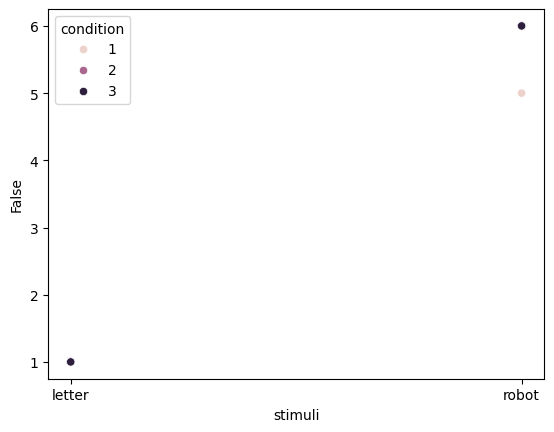

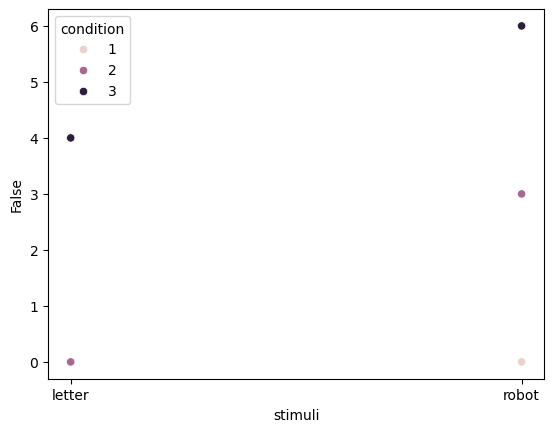

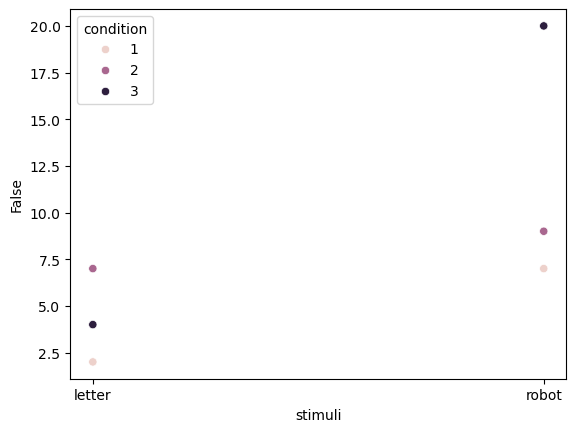

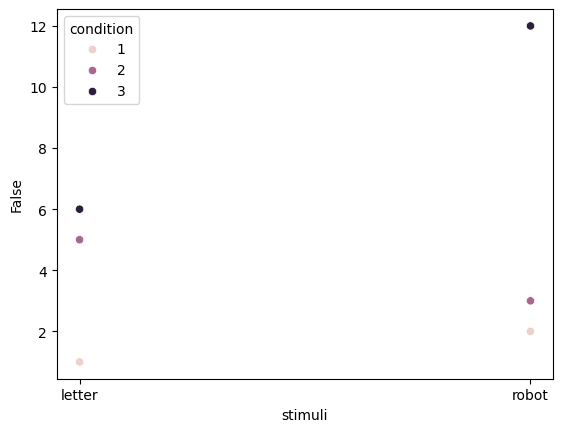

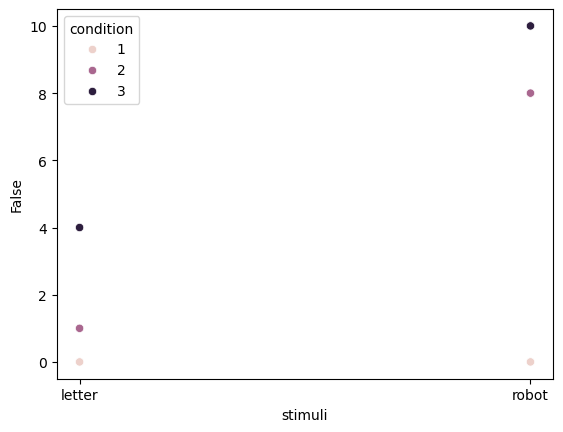

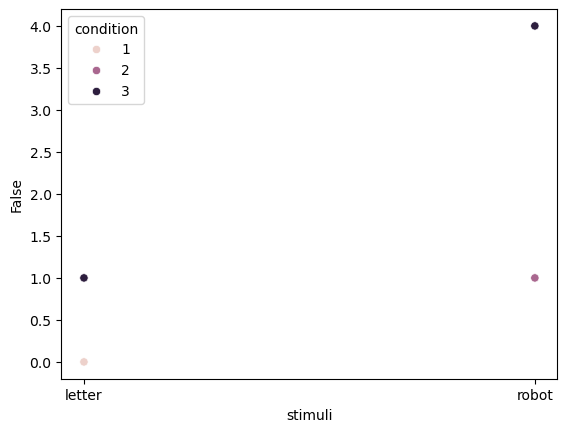

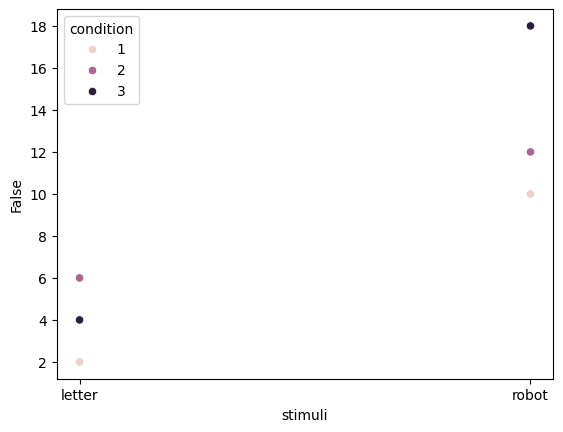

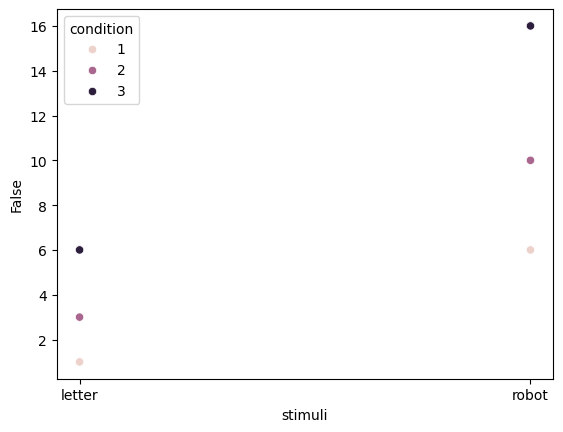

In [16]:
for subject in main_result_df['subject'].unique():
    subject_df = accuracy_df[accuracy_df['subject']==subject]
    # for i, stimuli in enumerate(['letter', 'robot']):
    #     ax = axs[subject, i]
        # plot_df = accuracy_df[accuracy_df['stimuli']==stimuli]
    sns.scatterplot(data=subject_df, x='stimuli', y=False, hue='condition')
    # ax.set_title(f'{subject}_{stimuli}')
    plt.show()

### Response Time

In [18]:
iv = ['subject','stimuli','condition']
dv = 'rt'

rt_df = main_result_df.groupby(by=iv, as_index=False)[dv].mean()

rt_df.head()

,subject,stimuli,condition,rt
0,0,letter,1,0.930174
1,0,letter,2,2.622479
2,0,letter,3,2.312128
3,0,robot,1,1.842059
4,0,robot,2,5.737390


0


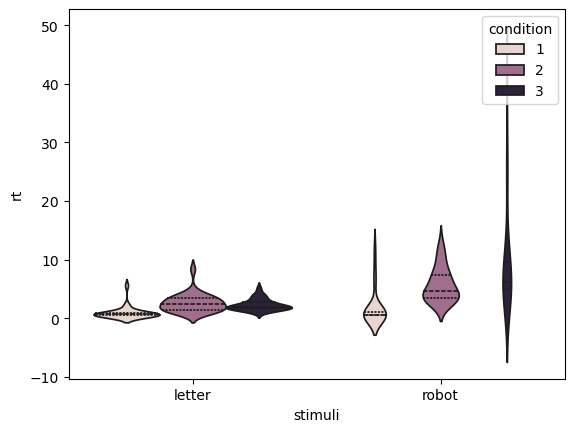

1


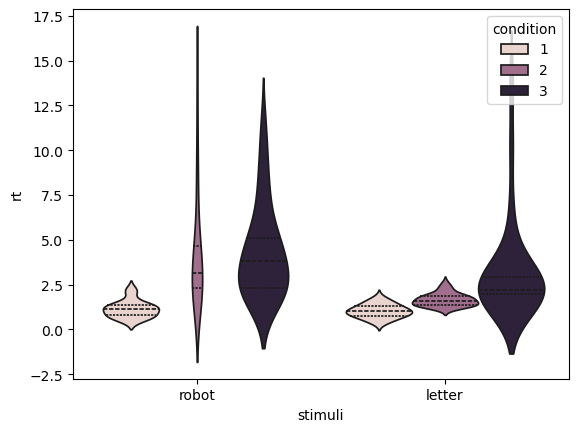

2


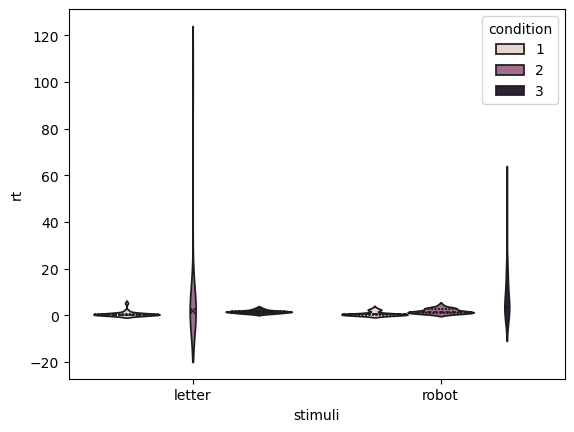

3


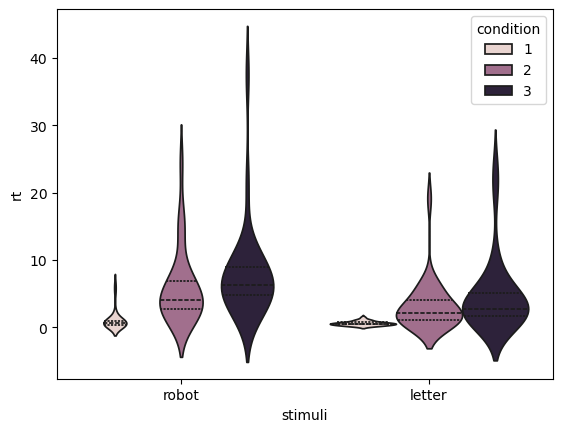

4


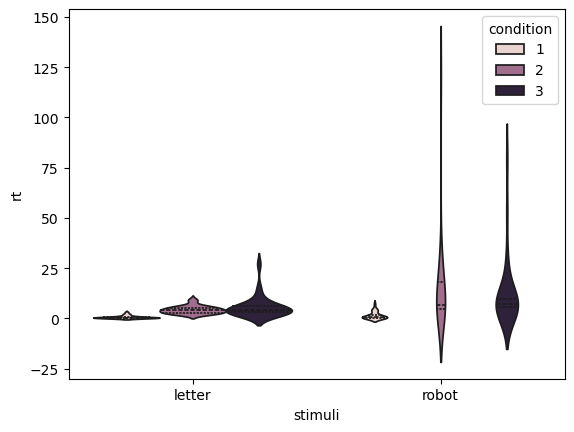

5


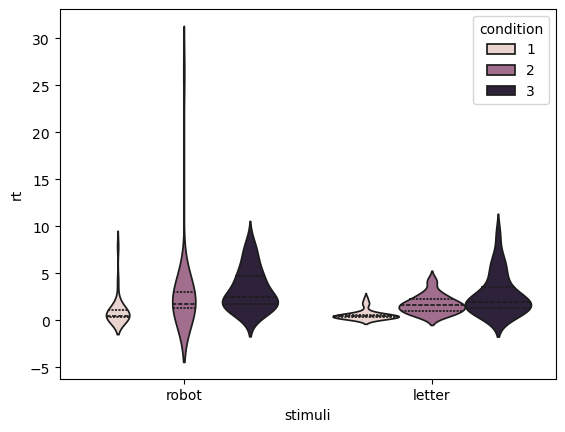

6


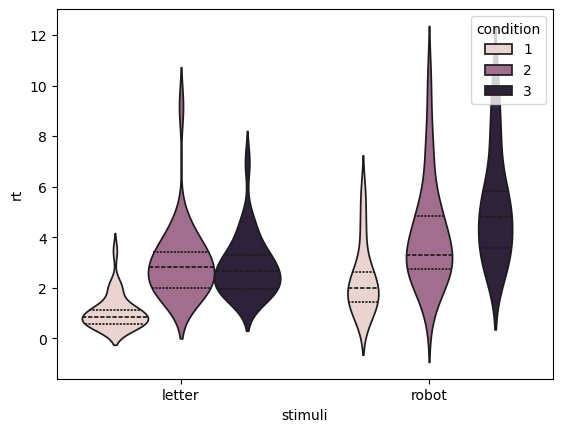

7


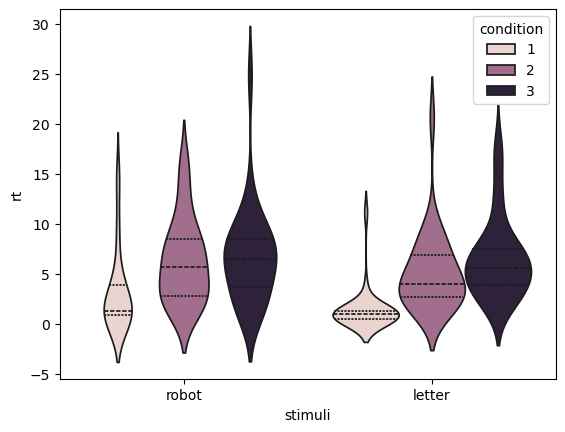

In [22]:
for subject in main_result_df['subject'].unique():
    subject_df = main_result_df[main_result_df['subject']==subject]

    print(subject)
    sns.violinplot(data=subject_df, x='stimuli', y='rt', hue='condition',inner='quart')
    plt.show()

### RSME

In [23]:
iv = ['subject','stimuli','condition']
dv = 'rsme'

rsme_df = main_result_df[main_result_df[dv]!='None'].copy()
rsme_df['rsme'] = rsme_df['rsme'].astype(float)

rsme_df[iv+[dv]].head()

,subject,stimuli,condition,rsme
26,0,letter,1,2.376543
35,0,letter,3,2.376543
44,0,letter,2,2.376543
53,0,robot,3,16.419753
62,0,robot,1,7.160494


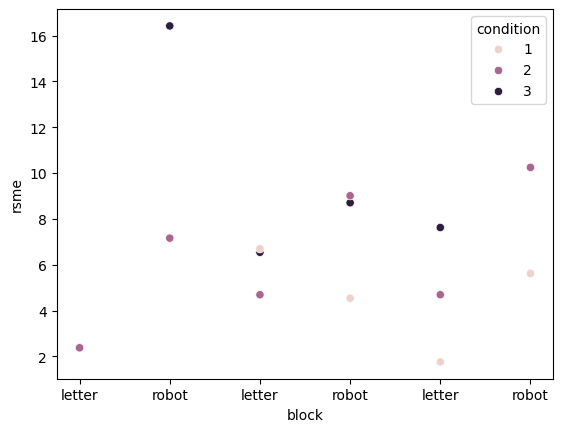

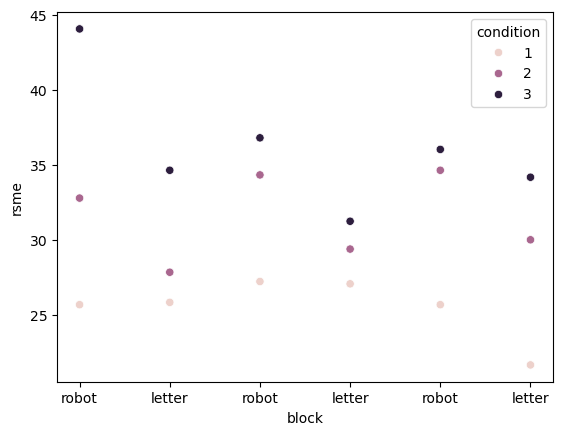

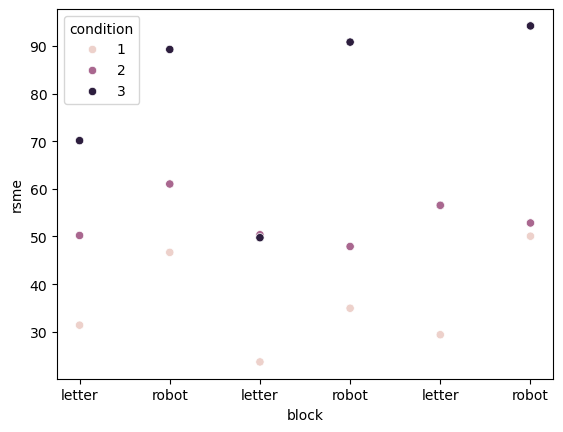

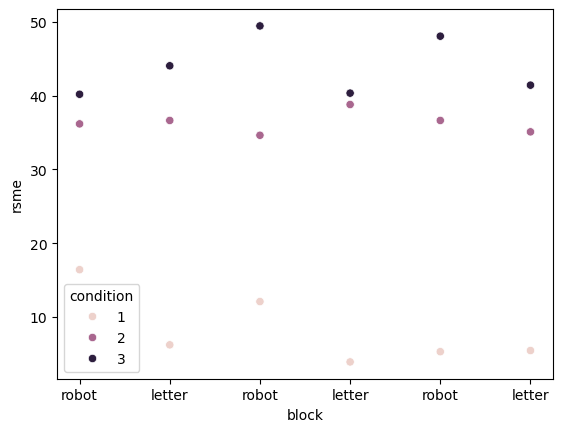

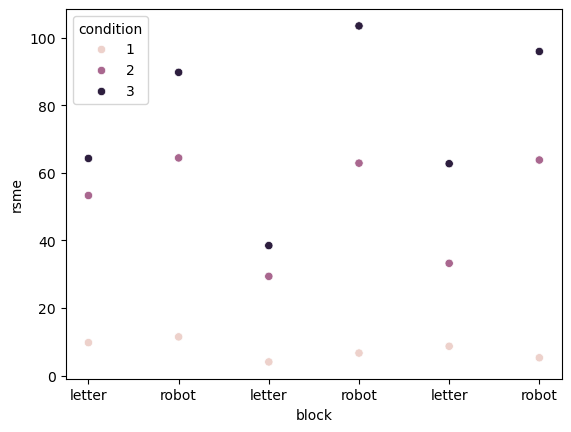

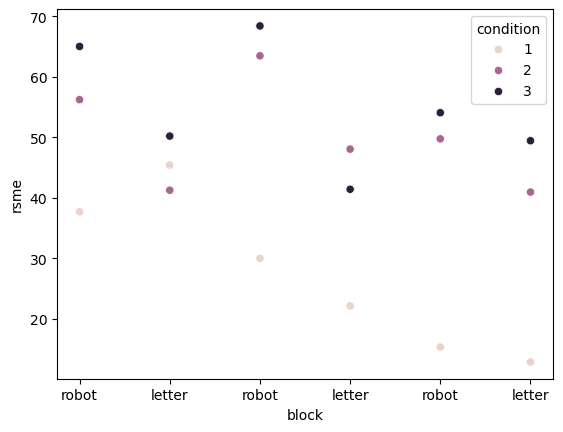

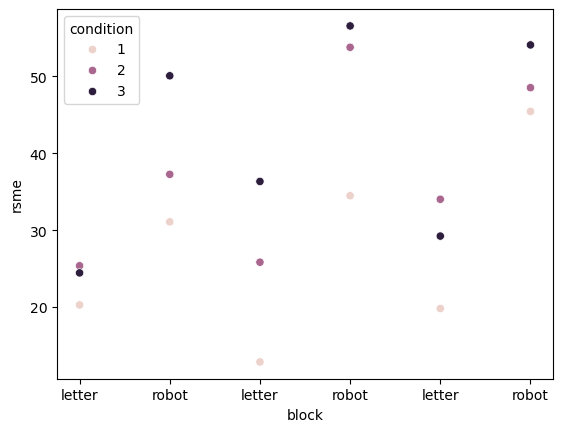

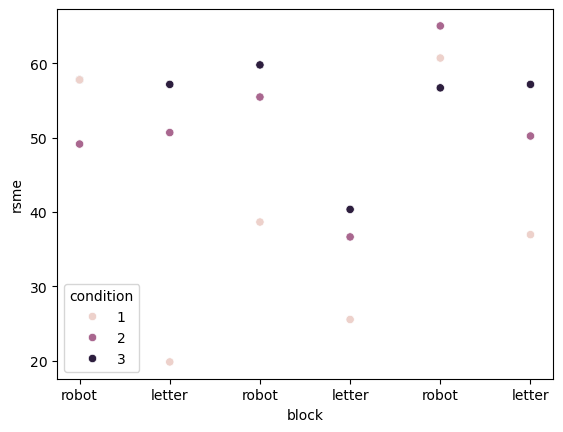

In [27]:
for subject in main_result_df['subject'].unique():
    fig, ax = plt.subplots()
    subject_df = rsme_df[rsme_df['subject']==subject]

    sns.scatterplot(data=subject_df, x='block', y='rsme', hue='condition', ax=ax)

    block_order = subject_df[['block','stimuli']].apply(tuple, axis=1).unique()
    ax.set_xticks([elem[0] for elem in block_order], [elem[1] for elem in block_order])

    plt.show()

# Group Level

## Loading

In [4]:
all_results = []
all_match = []
for subject_dir in os.listdir(data_dir):
    result_fnames = [elem for elem in os.listdir(f'data\\{subject_dir}') if elem.split('_')[0]==subject_dir.split('_')[-1] and elem.split('.')[-1]=='csv']

    if len(result_fnames)>0:
        result_fname = result_fnames[-1]
        df = pd.read_csv(f"{data_dir}\\{subject_dir}\\{result_fname}")
        df = df[df['sequence'].apply(lambda x : isinstance(x,str))]
        df['is_training'] = df['training.thisTrialN'].notna()

        all_results.append(df)
        all_match.append(subject_dir)

print(f"Get results from subject : {sorted([int(elem.split('_')[-1])for elem in all_match])}")

if len(all_match)>0:
    all_result_df = pd.concat(all_results).reset_index(drop=True)
    loaded_subjects = all_result_df['subject'].unique()

Get results from subject : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [5]:
main_result_df = all_result_df[all_result_df['is_training']==False]

column_of_interest = ['sequence', 'target', 'target_idx', 'choices', 'odd_ones', 'parameter', 'condition', 'stimuli', 'block', 'subject', 'is_training', 'trials.thisTrialN', 'recall_key.keys', 'recall_key.rt', 'RSME_ticks.response']
main_result_df = main_result_df[column_of_interest].rename(columns={'trials.thisTrialN':'trial_n', 'recall_key.keys':'keys', 'recall_key.rt':'rt', 'RSME_ticks.response':'rsme', 'target':'target_name'})

for col in ['sequence', 'choices', 'odd_ones']:
    main_result_df[col] = main_result_df[col].apply(ast.literal_eval)

main_result_df[['condition','block','subject','trial_n']] = main_result_df[['condition','block','subject','trial_n']].astype(int)

main_result_df['selected_idx'] = main_result_df['keys'].astype(int) - 1
main_result_df['selected_name'] = main_result_df.apply(lambda x : x['sequence'][x['selected_idx']], axis=1)

main_result_df['r_odd_ones'] = main_result_df['odd_ones'].apply(lambda x : {value:key for key, value in x.items()})
main_result_df['target_parameter'] = main_result_df['parameter']
main_result_df['selected_parameter'] = main_result_df.apply(lambda x : x['r_odd_ones'][x['selected_name']] if x['selected_name'] in x['r_odd_ones'].keys() else 'other', axis=1)

main_result_df['correct'] = main_result_df['selected_parameter'] == main_result_df['target_parameter']

main_result_df = main_result_df.reset_index(drop=True)
main_result_df.head()

,sequence,target_name,target_idx,choices,odd_ones,parameter,condition,stimuli,block,subject,...,trial_n,keys,rt,rsme,selected_idx,selected_name,r_odd_ones,target_parameter,selected_parameter,correct
0,"[blue_bottom_R_0, red_bottom_N_0, blue_left_Q_...",blue_left_Q_0,2.0,[position],"{'color': 'red_bottom_N_0', 'position': 'blue_...",position,1,letter,1,0,...,0,3.0,1.081057,NaN,2,blue_left_Q_0,"{'red_bottom_N_0': 'color', 'blue_left_Q_0': '...",position,position,True
1,"[blue_right_T_0, red_right_N_45, blue_bottom_L...",blue_bottom_L_45,2.0,[position],"{'color': 'red_right_N_45', 'position': 'blue_...",position,1,letter,1,0,...,1,3.0,5.593063,NaN,2,blue_bottom_L_45,"{'red_right_N_45': 'color', 'blue_bottom_L_45'...",position,position,True
2,"[red_top_V_0, blue_top_H_45, blue_right_M_0, b...",blue_top_H_45,1.0,[orientation],"{'color': 'red_top_V_0', 'position': 'blue_rig...",orientation,1,letter,1,0,...,2,2.0,0.742668,NaN,1,blue_top_H_45,"{'red_top_V_0': 'color', 'blue_right_M_0': 'po...",orientation,orientation,True
3,"[blue_right_J_45, blue_bottom_S_0, blue_bottom...",red_bottom_Z_45,3.0,[color],"{'color': 'red_bottom_Z_45', 'position': 'blue...",color,1,letter,1,0,...,3,4.0,0.456034,NaN,3,red_bottom_Z_45,"{'red_bottom_Z_45': 'color', 'blue_right_J_45'...",color,color,True
4,"[red_left_H_0, red_bottom_X_45, red_bottom_G_0...",blue_bottom_W_0,3.0,[color],"{'color': 'blue_bottom_W_0', 'position': 'red_...",color,1,letter,1,0,...,4,4.0,0.732281,NaN,3,blue_bottom_W_0,"{'blue_bottom_W_0': 'color', 'red_left_H_0': '...",color,color,True


## Time

In [6]:
iv1 = 'subject'
iv2 = 'stimuli'
block_start = 'block_intro_key.started'
block_start_var = 'block_intro_key.rt'
block_end = 'RSME_ticks.stopped'
block_end_var = 'RSME_ticks.response'

time_df_list = []
time_result_df = all_result_df[all_result_df['is_training']==False]
for group, subdf in time_result_df.groupby(iv1):
    time_subdf = subdf[[iv2, block_start_var, block_start]].dropna()[[iv2, block_start]].reset_index(drop=True).reset_index().rename(columns={block_start:'start'})
    time_subdf['end'] = subdf[[block_end_var, block_end]].dropna()[block_end].reset_index(drop=True)
    time_subdf['duration'] = time_subdf['end'] - time_subdf['start']
    time_subdf['subject'] = int(group)
    time_df_list.append(time_subdf)

time_df = pd.concat(time_df_list)

display(time_df.groupby(by='stimuli')['duration'].describe())
display(time_df.groupby(by='stimuli')['duration'].mean().apply(lambda x : f"{int(x/60)}min {round(x%60)}s"))

,count,mean,std,min,25%,50%,75%,max
stimuli,,,,,,,,
letter,216.0,135.960191,41.050964,102.869124,113.270832,122.665687,137.764682,425.205191
robot,216.0,202.675474,47.440912,156.434071,173.601860,188.326914,209.839797,458.485781


stimuli
letter    2min 16s
robot     3min 23s
Name: duration, dtype: object

## Outliers

In [81]:
# Using previous run, subject 4 & 11 rt are more than 3 std higher than other subjects (on at least on condition)
outliers = [4, 11]
# outliers = []
clean_result = main_result_df[main_result_df['subject'].apply(lambda x : x not in outliers)].copy()

## Accuracy

### Detailed view

In [82]:
# Split stimuli for accurate computation
accuracy_letter_df = clean_result[clean_result['stimuli']=='letter'].copy()
accuracy_robot_df = clean_result[clean_result['stimuli']=='robot'].copy()

In [83]:
def get_complex_confusion(x, answer_col, target_col, parameter):
    answer, target = x[answer_col], x[target_col]

    if (answer == parameter) and (target == parameter):
        return 'tp'

    if (answer == parameter) and (target != parameter):
        return 'fp'

    if (answer != parameter) and (target != parameter):
        return 'tn'

    if (answer != parameter) and (target == parameter):
        return 'fn'

for df in [accuracy_letter_df, accuracy_robot_df]:
    print(f"For stimuli {df['stimuli'].unique()} compute confusion on {df['parameter'].unique().tolist()}")
    for parameter in df['parameter'].unique():
        df[f'{parameter}_confusion'] = df.apply(lambda x : get_complex_confusion(x, 'selected_parameter', 'target_parameter', parameter),axis=1)

For stimuli ['letter'] compute confusion on ['position', 'orientation', 'color']
For stimuli ['robot'] compute confusion on ['localisation', 'movement', 'laterality']


letter position_confusion


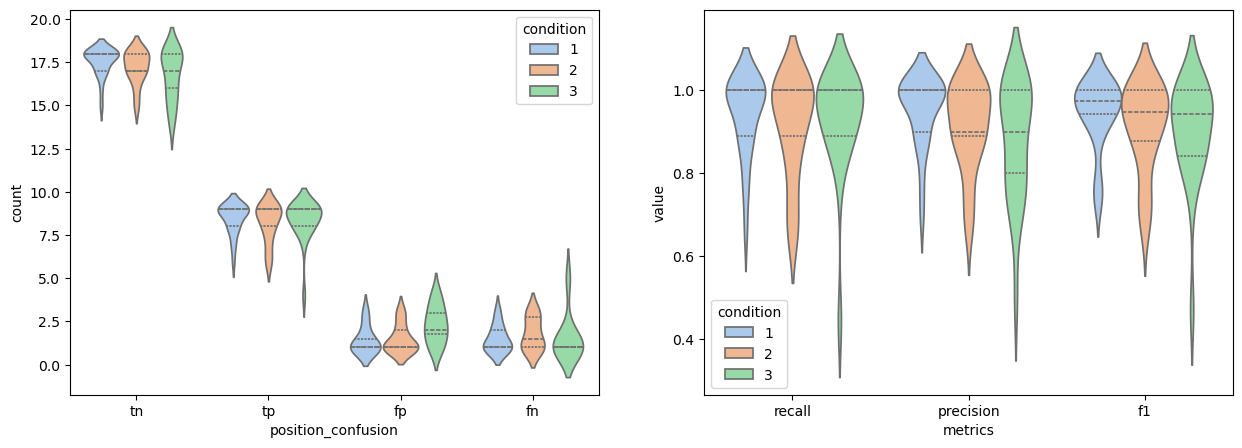

letter orientation_confusion


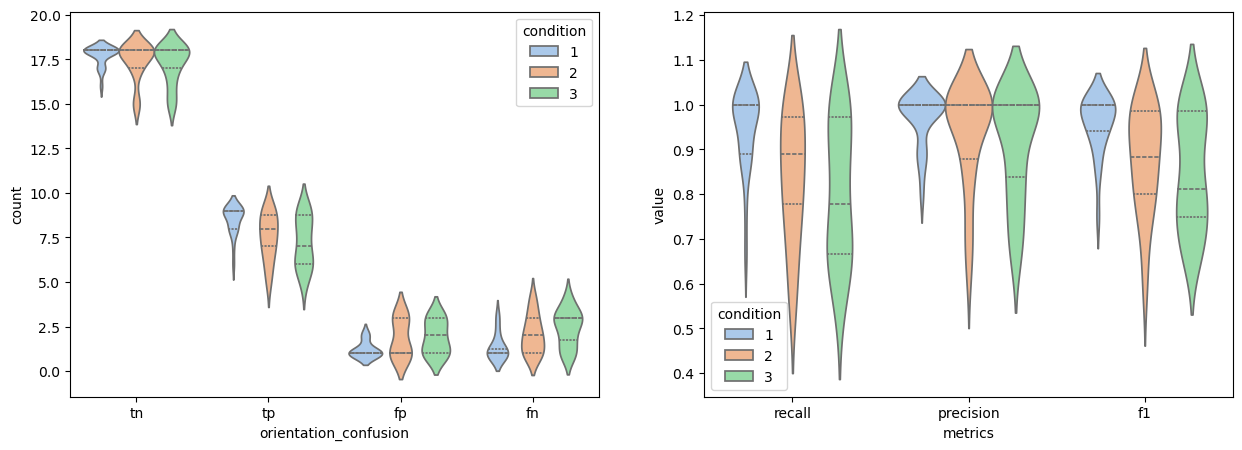

letter color_confusion


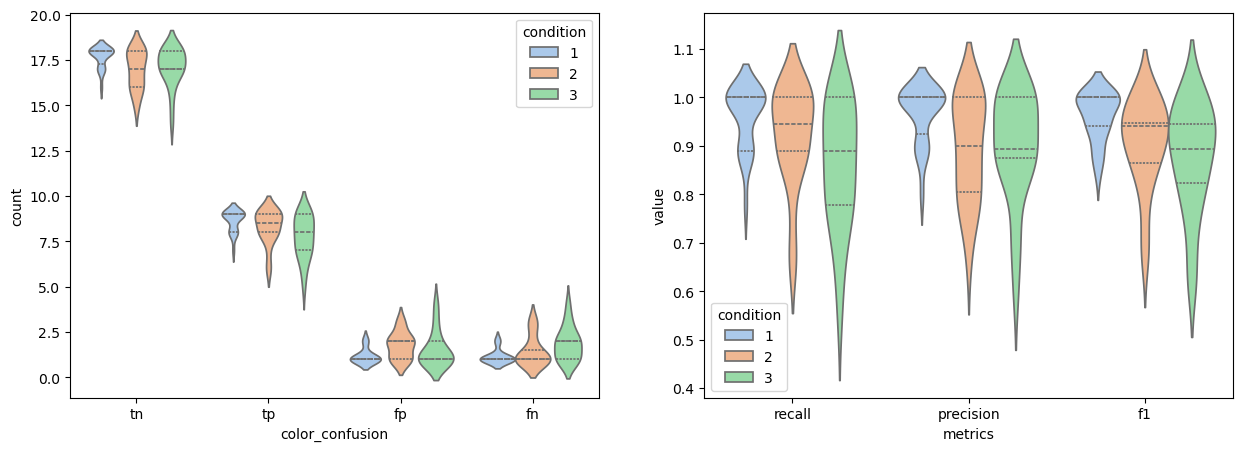

robot localisation_confusion


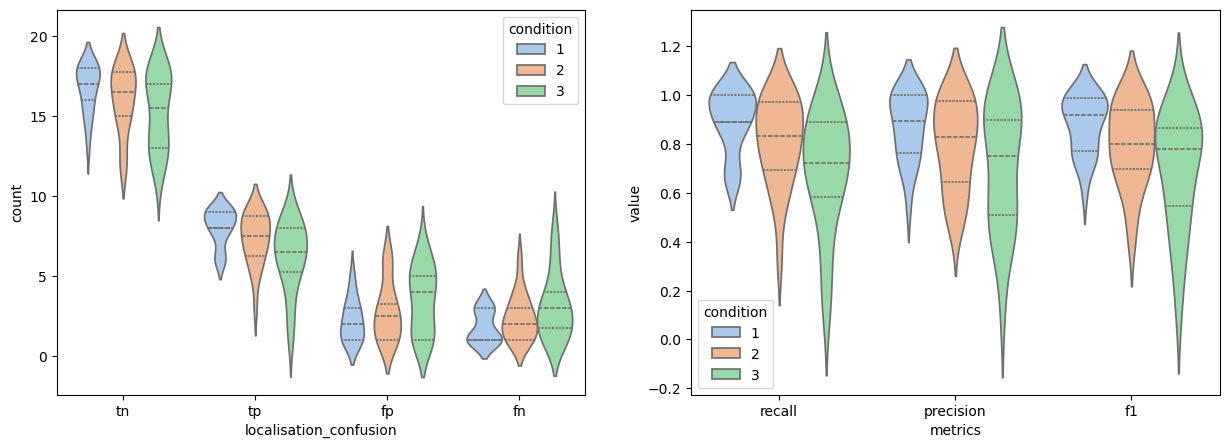

robot movement_confusion


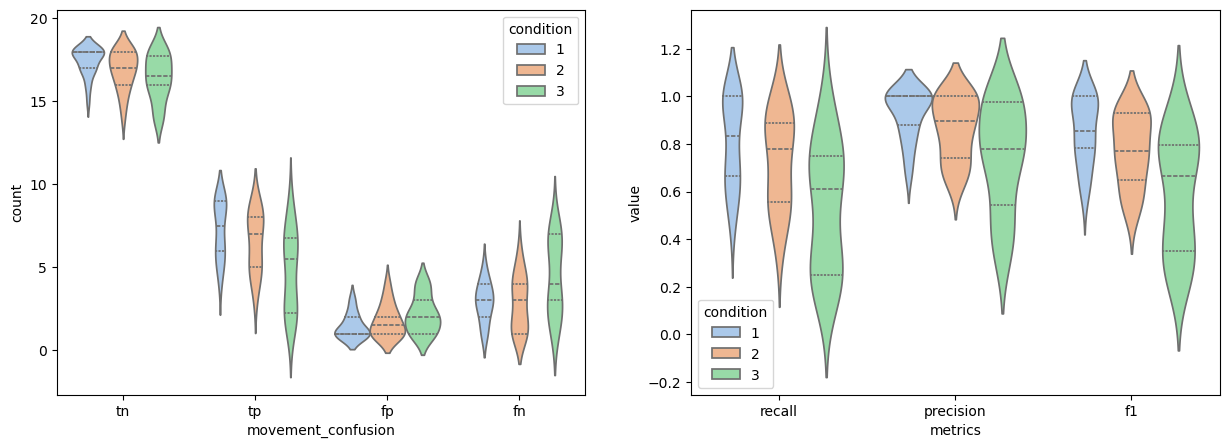

robot laterality_confusion


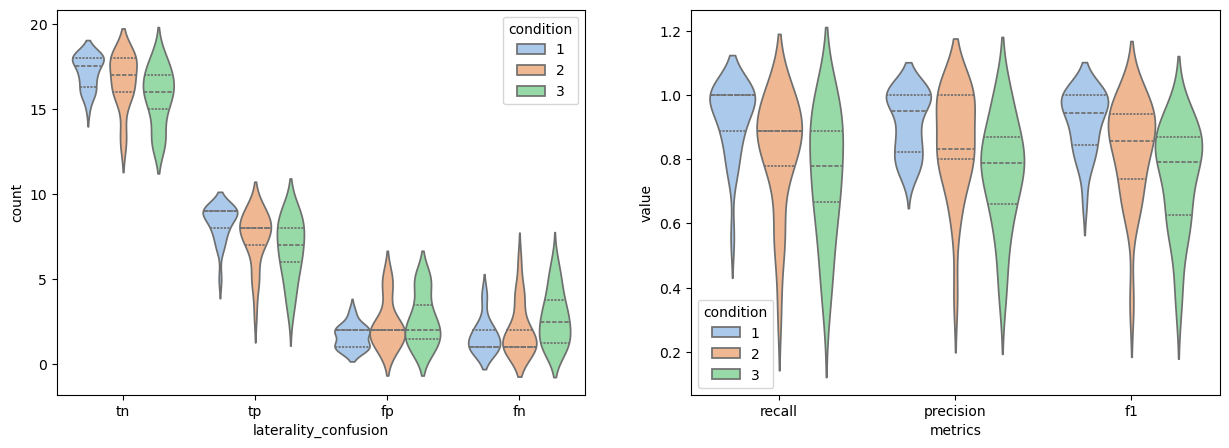

In [84]:
iv = ['subject','stimuli','condition']
order = ['tn', 'tp', 'fp', 'fn']

accuracy_subdf_list = []
for df in [accuracy_letter_df, accuracy_robot_df]:
    dvs = [f"{parameter}_confusion" for parameter in df['parameter'].unique()]
    for dv in dvs:
        print(df['stimuli'].unique()[0], dv)
        melted_accuracy_subdf = df.groupby(by=iv, as_index=False)[dv].value_counts()
        melted_accuracy_subdf[dv] = pd.Categorical(melted_accuracy_subdf[dv], categories=order)

        accuracy_subdf = melted_accuracy_subdf.pivot(columns=dv, index=iv).fillna(0).astype(int)
        accuracy_subdf.columns = [elem[1] for elem in accuracy_subdf.columns]

        accuracy_subdf = accuracy_subdf.reset_index()
        accuracy_subdf['parameter'] = dv.split('_')[0]

        accuracy_subdf['occurence'] = accuracy_subdf['tp'] + accuracy_subdf['fn']
        accuracy_subdf['correct'] =  accuracy_subdf['tp'] / accuracy_subdf['occurence']
        accuracy_subdf['recall'] = accuracy_subdf['tp']/(accuracy_subdf['tp']+accuracy_subdf['fn'])
        accuracy_subdf['precision'] = accuracy_subdf['tp']/(accuracy_subdf['tp']+accuracy_subdf['fp'])
        accuracy_subdf['f1'] = 2*(accuracy_subdf['recall']*accuracy_subdf['precision'])/(accuracy_subdf['recall']+accuracy_subdf['precision'])

        accuracy_subdf_list.append(accuracy_subdf)

        remelted_accuracy_subdf = accuracy_subdf.melt(id_vars=iv, value_vars=['recall', 'precision', 'f1'], var_name='metrics')
        # melted_accuracy_subdf = melted_accuracy_subdf.rename(columns={dv:'confusion'})
        # melted_accuracy_subdf_list.append(melted_accuracy_subdf)

        fig, axs = plt.subplots(1,2, figsize=(15,5))
        sns.violinplot(data=melted_accuracy_subdf, x=dv, y='count', inner='quart', hue='condition', ax=axs[0], palette='pastel')
        sns.violinplot(data=remelted_accuracy_subdf, x='metrics', y='value', inner='quart', hue='condition', ax=axs[1], palette='pastel')
        plt.show()

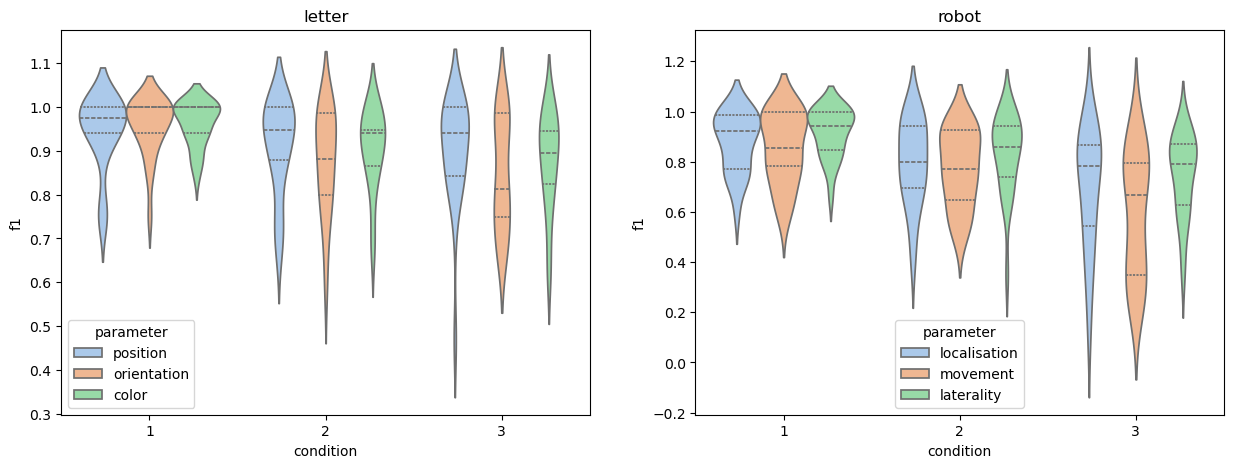

In [85]:
concat_accuracy_df = pd.concat(accuracy_subdf_list).reset_index(drop=True)

fig, axs = plt.subplots(1,2, figsize=(15,5))
for i, stimuli in enumerate(['letter', 'robot']):
    ax=axs[i]
    accuracy_plotdf = concat_accuracy_df[concat_accuracy_df['stimuli']==stimuli]
    sns.violinplot(data=accuracy_plotdf, x='condition', y='f1', hue='parameter', palette='pastel', inner='quart', ax=ax)
    ax.set_title(stimuli)

plt.show()

### Reduced view

In [86]:
iv = ['subject','stimuli','condition']
metrics = ['f1', 'correct']

accuracy_df = concat_accuracy_df.groupby(iv)[metrics].mean().reset_index()

accuracy_df

,subject,stimuli,condition,f1,correct
0,0,letter,1,0.980392,0.962963
1,0,letter,2,0.962848,0.962963
2,0,letter,3,0.962848,0.962963
3,0,robot,1,0.816420,0.814815
4,0,robot,2,0.822985,0.777778
...,...,...,...,...,...
127,23,letter,2,0.848677,0.851852
128,23,letter,3,0.772727,0.777778
129,23,robot,1,0.847368,0.851852
130,23,robot,2,0.775000,0.777778


c:\Users\ma.rihet\.conda\envs\epiic\Lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
c:\Users\ma.rihet\.conda\envs\epiic\Lib\site-packages\pingouin\distribution.py:508: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  .diff(axis=1)


stimuli  condition
letter   1            0.953580
         2            0.895363
         3            0.873390
robot    1            0.882337
         2            0.799192
         3            0.676833
Name: f1, dtype: float64

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,stimuli,0.485738,1,21,0.485738,41.163650,2.328913e-06,2.328913e-06,0.662182,1.000000
1,condition,0.448934,2,42,0.224467,39.892626,1.953198e-10,7.283047e-08,0.655131,0.691083
2,stimuli * condition,0.096809,2,42,0.048404,13.938014,2.276894e-05,1.144048e-04,0.398935,0.796323


c:\Users\ma.rihet\.conda\envs\epiic\Lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
c:\Users\ma.rihet\.conda\envs\epiic\Lib\site-packages\pingouin\distribution.py:508: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  .diff(axis=1)


stimuli  condition
letter   1            0.947811
         2            0.887205
         3            0.863636
robot    1            0.875421
         2            0.786195
         3            0.656566
Name: correct, dtype: float64

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,stimuli,0.530781,1,21,0.530781,42.979484,1.710445e-06,1.710445e-06,0.671770,1.000000
1,condition,0.505071,2,42,0.252536,43.981815,4.988576e-11,2.357610e-08,0.676833,0.699614
2,stimuli * condition,0.110758,2,42,0.055379,16.745324,4.492405e-06,3.143202e-05,0.443640,0.794253


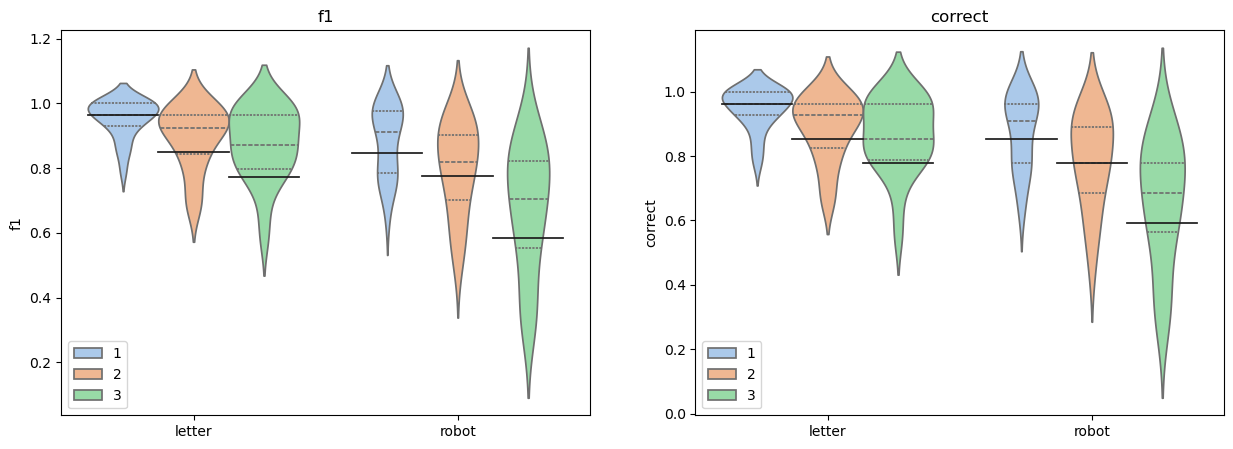

In [87]:
iv = ['stimuli', 'condition']
metrics = ['f1', 'correct']
fig, axs = plt.subplots(1, 2, figsize = (15,5))

subject = 23
data = accuracy_df
stats=True

for i in range(2):
    ax = axs[i]
    metric = metrics[i]

    if stats:
            stat_df = pg.rm_anova(dv=metric, within=iv, subject='subject', data=data, detailed=True, effsize='np2')
            display(data.groupby(by=iv)[metric].mean())
            display(stat_df)

    sns.violinplot(data=data, x=iv[0], y=metric, hue=iv[1],inner='quarter', ax=ax, palette='pastel')
    handles, labels = ax.get_legend_handles_labels()

    if subject != None:
            subject_df = data[data['subject']==subject]
            sns.violinplot(data=subject_df, x=iv[0], y=metric, hue=iv[1], inner='point',ax=ax)

    ax.legend(handles, labels)
    ax.set_title(f'{metric}')
    ax.set_xlabel('')

plt.show()

In [88]:
metric = 'correct'
data = accuracy_df

z_df = zscore_by_condition(data, metric, ['stimuli', 'condition'])
z_df[z_df[f'z_{metric}']>3]

,subject,stimuli,condition,f1,correct,z_correct


## Response Time

In [89]:
clean_result['z_rt'] = get_zscore(clean_result['rt'])
clean_result['abs_z_rt'] = clean_result['z_rt'].apply(abs)

In [90]:
clean_result[clean_result['abs_z_rt']>3]['subject'].value_counts()

subject
2     9
3     9
7     8
0     4
13    3
22    3
1     2
21    1
23    1
5     1
9     1
Name: count, dtype: int64

In [91]:
iv = ['subject','stimuli','condition']
dv = 'rt'

rt_df = clean_result.groupby(by=iv, as_index=False)[dv].mean()

rt_df.head()

,subject,stimuli,condition,rt
0,0,letter,1,0.930174
1,0,letter,2,2.622479
2,0,letter,3,2.312128
3,0,robot,1,1.842059
4,0,robot,2,5.737390


c:\Users\ma.rihet\.conda\envs\epiic\Lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
c:\Users\ma.rihet\.conda\envs\epiic\Lib\site-packages\pingouin\distribution.py:508: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  .diff(axis=1)


stimuli  condition
letter   1            0.778930
         2            2.527025
         3            2.970252
robot    1            1.374867
         2            3.321530
         3            4.669847
Name: rt, dtype: float64

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,stimuli,35.010522,1,21,35.010522,29.721056,2.079858e-05,2.079858e-05,0.585971,1.000000
1,condition,172.188076,2,42,86.094038,107.413227,3.060555e-17,4.807579e-12,0.836465,0.654424
2,stimuli * condition,7.614479,2,42,3.807239,3.312600,4.614723e-02,5.941018e-02,0.136250,0.787675


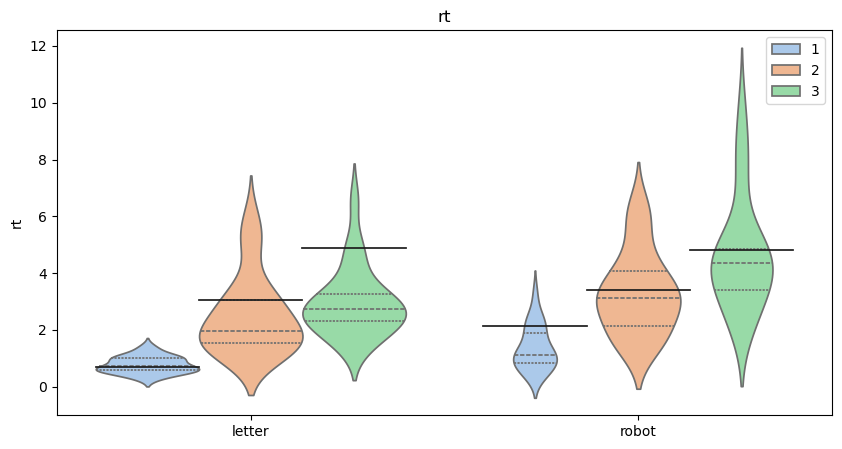

In [92]:
iv = ['stimuli', 'condition']
metrics = ['rt']
fig, axs = plt.subplots(len(metrics), figsize = (10,5))

subject = 23
data = rt_df
stat=True

for i, metric in enumerate(metrics):
        # ax = axs[i]
        ax=axs
        if stats:
                stat_df = pg.rm_anova(dv=metric, within=iv, subject='subject', data=data, detailed=True, effsize='np2')
                display(data.groupby(by=iv)[metric].mean())
                display(stat_df)

        sns.violinplot(data=data, x=iv[0], y=metric, hue=iv[1],inner='quarter', ax=ax, palette='pastel')
        handles, labels = ax.get_legend_handles_labels()

        if subject != None:
                subject_df = data[data['subject']==subject]
                sns.violinplot(data=subject_df, x=iv[0], y=metric, hue=iv[1], inner='point',ax=ax)

        ax.legend(handles, labels)
        ax.set_title(f'{metric}')
        ax.set_xlabel('')

plt.show()

In [93]:
metric = 'rt'
data = rt_df

z_df = zscore_by_condition(data, metric, ['stimuli', 'condition'])
z_df[z_df[f'z_{metric}']>3]
# z_df.sort_values(by='z_rt', ascending=False)

,subject,stimuli,condition,rt,z_rt
38,7,letter,3,6.56826,3.000972


## Subjectif

In [94]:
iv = ['subject','stimuli','condition']
dv = 'rsme'

clean_result_subdf = clean_result[clean_result['rsme']!='None'].copy()
clean_result_subdf['rsme'] = clean_result_subdf['rsme'].astype(float)

rsme_df = clean_result_subdf.groupby(by=iv, as_index=False)[dv].mean()

rsme_df.head()

,subject,stimuli,condition,rsme
0,0,letter,1,3.611111
1,0,letter,2,3.919753
2,0,letter,3,5.514403
3,0,robot,1,5.771605
4,0,robot,2,8.806584


c:\Users\ma.rihet\.conda\envs\epiic\Lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
c:\Users\ma.rihet\.conda\envs\epiic\Lib\site-packages\pingouin\distribution.py:508: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  .diff(axis=1)


stimuli  condition
letter   1            20.550278
         2            39.823099
         3            49.397346
robot    1            32.620451
         2            52.711039
         3            64.873203
Name: rsme, dtype: float64

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,stimuli,5994.654876,1,21,5994.654876,81.258508,1.154183e-08,1.154183e-08,0.794638,1.000000
1,condition,21102.171576,2,42,10551.085788,45.682494,2.899724e-11,8.624489e-08,0.685075,0.620084
2,stimuli * condition,69.537367,2,42,34.768683,0.968143,3.881010e-01,3.787316e-01,0.044070,0.872013


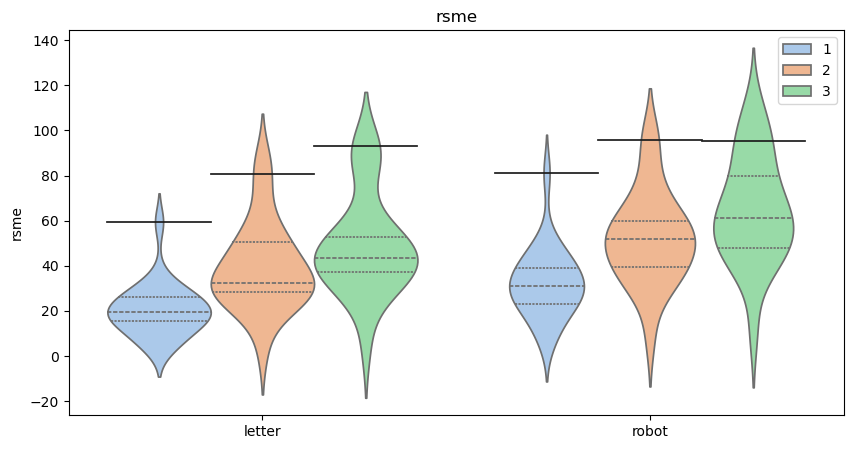

In [95]:
iv = ['stimuli', 'condition']
metrics = ['rsme']
fig, axs = plt.subplots(len(metrics), figsize = (10,5))

subject = 22
data = rsme_df
stat = True

for i, metric in enumerate(metrics):
        # ax = axs[i]
        ax=axs
        if stats:
                stat_df = pg.rm_anova(dv=metric, within=iv, subject='subject', data=data, detailed=True, effsize='np2')
                display(data.groupby(by=iv)[metric].mean())
                display(stat_df)

        sns.violinplot(data=data, x=iv[0], y=metric, hue=iv[1],inner='quarter', ax=ax, palette='pastel')
        handles, labels = ax.get_legend_handles_labels()

        if subject != None:
                subject_df = data[data['subject']==subject]
                sns.violinplot(data=subject_df, x=iv[0], y=metric, hue=iv[1], inner='point',ax=ax)

        ax.legend(handles, labels)
        ax.set_title(f'{metric}')
        ax.set_xlabel('')

plt.show()

In [96]:
metric = 'rsme'
data = rsme_df

z_df = zscore_by_condition(data, metric, ['stimuli', 'condition'])
z_df[z_df[f'z_{metric}']>3]

,subject,stimuli,condition,rsme,z_rsme
120,22,letter,1,59.391534,3.288143
123,22,robot,1,81.084656,3.065344


## All results

In [97]:
iv = ['subject', 'stimuli', 'condition']
metrics = ['correct', 'f1', 'rt', 'rsme']
result_df = accuracy_df.merge(rt_df, left_on=iv, right_on=iv).merge(rsme_df, left_on=iv, right_on=iv)
result_df = result_df[iv + metrics]

result_df

,subject,stimuli,condition,correct,f1,rt,rsme
0,0,letter,1,0.962963,0.980392,0.930174,3.611111
1,0,letter,2,0.962963,0.962848,2.622479,3.919753
2,0,letter,3,0.962963,0.962848,2.312128,5.514403
3,0,robot,1,0.814815,0.816420,1.842059,5.771605
4,0,robot,2,0.777778,0.822985,5.737390,8.806584
...,...,...,...,...,...,...,...
127,23,letter,2,0.851852,0.848677,3.050708,66.534392
128,23,letter,3,0.777778,0.772727,4.874740,92.037037
129,23,robot,1,0.851852,0.847368,2.131990,30.026455
130,23,robot,2,0.777778,0.775000,3.389499,73.730159


In [98]:
result_df.to_csv("cogshifting_results.csv", index=False)